In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ice-cream-sales-analysis-temperature-and-weather/Icecream Sales wr Rain and Temperature.csv


In [7]:
file_path = r'/kaggle/input/ice-cream-sales-analysis-temperature-and-weather/Icecream Sales wr Rain and Temperature.csv'

# Carregar o arquivo CSV
df = pd.read_csv(file_path)

# Visualizar as primeiras linhas dos dados
df.head()

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,No
1,75.2,1.0,86.4,85,No
2,86.0,2.0,99.2,107,No
3,75.2,2.0,72.4,71,Yes
4,60.8,2.0,71.2,65,Yes


In [8]:
# Visualizar as 10 primeiras linhas
df.head(10)

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.00,89.5,90,No
1,75.2,1.00,86.4,85,No
2,86.0,2.00,99.2,107,No
3,75.2,2.00,72.4,71,Yes
4,60.8,2.00,71.2,65,Yes
5,68.0,2.00,71.0,69,Yes
6,71.6,1.25,78.0,67,Yes
7,66.2,1.50,74.3,70,Yes
8,60.8,1.50,69.4,65,Yes
9,78.8,1.50,82.5,81,Yes


In [9]:
# Visualizar a estrutura completa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (F)                 20 non-null     float64
 1   Ice-cream Price ($)             20 non-null     float64
 2   Number of Tourists (thousands)  20 non-null     float64
 3   Ice Cream Sales ($,thousands)   20 non-null     int64  
 4   Did it rain on that day?        20 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [10]:
# Realizando Análise Exploratória de Dados (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

Estatísticas Descritivas:
        Temperature_F  Icecream_Price  Tourists_Thousands  \
count      20.000000       20.000000           20.000000   
mean       73.130000        1.362500           78.955000   
std         7.598137        0.496534           10.992556   
min        60.800000        0.750000           52.100000   
25%        67.550000        1.000000           71.175000   
50%        75.200000        1.375000           76.600000   
75%        78.800000        2.000000           88.025000   
max        86.000000        2.000000           99.200000   

       Icecream_Sales_Thousands  
count                 20.000000  
mean                  76.850000  
std                   13.259654  
min                   53.000000  
25%                   66.750000  
50%                   74.000000  
75%                   85.750000  
max                  107.000000  

Contagem de dias com e sem chuva:
 Rain
Yes    14
No      6
Name: count, dtype: int64


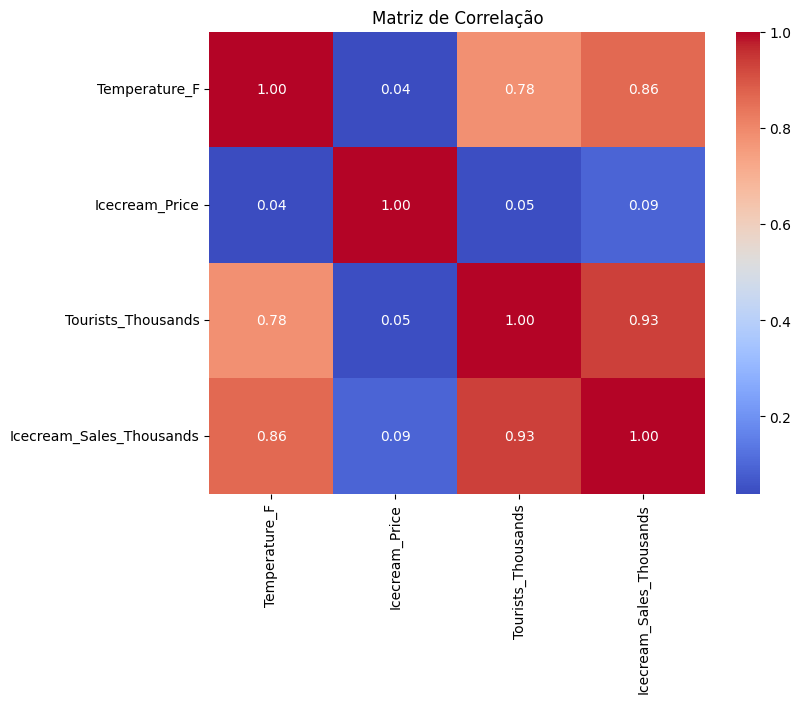

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


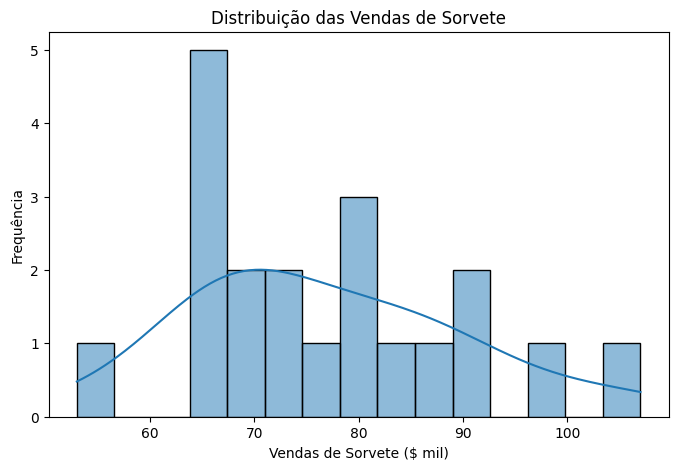

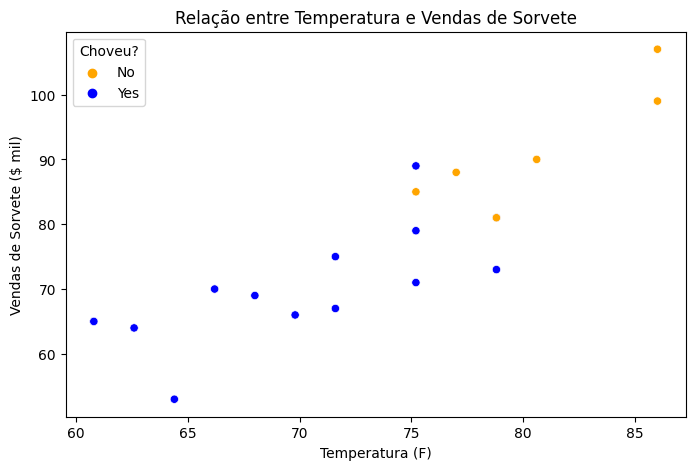

In [11]:
# Renomeando colunas para facilitar o manuseio
df.columns = ["Temperature_F", "Icecream_Price", "Tourists_Thousands", "Icecream_Sales_Thousands", "Rain"]

# Estatísticas descritivas gerais
stats = df.describe()
print("Estatísticas Descritivas:\n", stats)

# Contagem de valores únicos para a coluna "Rain" (Yes/No)
rain_counts = df["Rain"].value_counts()
print("\nContagem de dias com e sem chuva:\n", rain_counts)

# Matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Plotando a distribuição de vendas de sorvete
plt.figure(figsize=(8, 5))
sns.histplot(df["Icecream_Sales_Thousands"], bins=15, kde=True)
plt.title("Distribuição das Vendas de Sorvete")
plt.xlabel("Vendas de Sorvete ($ mil)")
plt.ylabel("Frequência")
plt.show()

# Plotando a relação entre temperatura e vendas de sorvete
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Temperature_F"], y=df["Icecream_Sales_Thousands"], hue=df["Rain"], palette={"Yes": "blue", "No": "orange"})
plt.title("Relação entre Temperatura e Vendas de Sorvete")
plt.xlabel("Temperatura (F)")
plt.ylabel("Vendas de Sorvete ($ mil)")
plt.legend(title="Choveu?")
plt.show()